In [1]:
import pandas as pd
import re

In [2]:
data = pd.read_csv('original canonical only merged dataframe.csv')

In [3]:
#label_file = pd.read_csv('datasets/EXPDRV+ALL.txt', sep="\t", header=None)

In [4]:
#label_file.columns = ['ACC_ID','Mutation AA match','label']

In [5]:
data['Mutation AA match'] = data['Mutation AA'].apply(lambda x: x[2:])

In [6]:
data

,Mutation AA,index,ACC_ID,UP_POS,Modification_name,sliced AA,Distance,Mutation AA match
0,p.P359L,1057,Q9UQF2,355,PhosphoS,359,-4,P359L
1,p.S895F,1591,Q69YQ0,893,PhosphoS,895,-2,S895F
2,p.S45P,1758,P35222,45,PhosphoS,45,0,S45P
3,p.T338I,2369,Q9H0H5,342,PhosphoT,338,4,T338I
4,p.S45P,3130,P35222,45,PhosphoS,45,0,S45P
...,...,...,...,...,...,...,...,...
57836,p.S33P,44393309,P35222,30,PhosphoY,33,-3,S33P
57837,p.P1746S,44393579,Q14686,1749,PhosphoT,1746,3,P1746S
57838,p.P1746S,44393579,Q14686,1751,PhosphoS,1746,5,P1746S
57839,p.E382K,44396386,P08172,380,PhosphoS,382,-2,E382K


In [7]:
#label_file

In [8]:
#data.merge(label_file, how='inner', on=['ACC_ID','Mutation AA match'], sort=False, indicator=False, copy=False, validate='m:m' )

In [9]:
tmp = []
with open('humsavar.txt') as file:
    for line in file:
        tmp.append((re.split(r'\s{2,}', line)[1:5]))

In [10]:
tmp

[['P04217', 'VAR_018369', 'p.His52Arg', 'LB/B'],
 ['P04217', 'VAR_018370', 'p.His395Arg', 'LB/B'],
 ['Q9NQ94', 'VAR_052201', 'p.Val555Met', 'LB/B'],
 ['Q9NQ94', 'VAR_059821', 'p.Ala558Ser', 'LB/B'],
 ['P01023', 'VAR_000012', 'p.Arg704His', 'LB/B'],
 ['P01023', 'VAR_000013', 'p.Cys972Tyr', 'LB/B'],
 ['P01023', 'VAR_000014', 'p.Ile1000Val', 'LB/B'],
 ['P01023', 'VAR_026820', 'p.Asn639Asp', 'LB/B'],
 ['P01023', 'VAR_026821', 'p.Leu815Gln', 'LB/B'],
 ['A8K2U0', 'VAR_055463', 'p.Gly207Arg', 'LB/B'],
 ['A8K2U0', 'VAR_055464', 'p.Cys970Tyr', 'LB/B'],
 ['A8K2U0', 'VAR_055465', 'p.Thr1131Met', 'LB/B'],
 ['A8K2U0', 'VAR_055466', 'p.Thr1412Ala', 'LB/B'],
 ['A8K2U0', 'VAR_059083', 'p.Asp850Glu', 'LB/B'],
 ['A8K2U0', 'VAR_059084', 'p.His1229Arg', 'LB/B'],
 ['A8K2U0', 'VAR_071854', 'p.Arg1122Trp', 'LB/B'],
 ['A8K2U0', 'VAR_071855', 'p.Met1257Val', 'LB/B'],
 ['A8K2U0', 'VAR_071856', 'p.Thr1312Met', 'LB/B'],
 ['A8K2U0', 'VAR_081010', 'p.Val296Ala', 'LB/B'],
 ['A8K2U0', 'VAR_081011', 'p.Pro356Arg', 'LB

In [11]:
labels_hums = []
for i,v in enumerate(tmp):
    try:
        lab = -1
        if v[3] == 'LB/B':
            lab = 0
        elif v[3] == 'LP/P':
            lab = 1
        else:
            lab = -1
        labels_hums.append([v[0],v[2][2] + re.findall(r'\d+', v[2])[0] + v[2][-3],lab])
    except:
        pass
    #print(v[2][2] + re.findall(r'\d+', v[2])[0] + v[2][-3])

In [12]:
labels_hums

[['P04217', 'H52A', 0],
 ['P04217', 'H395A', 0],
 ['Q9NQ94', 'V555M', 0],
 ['Q9NQ94', 'A558S', 0],
 ['P01023', 'A704H', 0],
 ['P01023', 'C972T', 0],
 ['P01023', 'I1000V', 0],
 ['P01023', 'A639A', 0],
 ['P01023', 'L815G', 0],
 ['A8K2U0', 'G207A', 0],
 ['A8K2U0', 'C970T', 0],
 ['A8K2U0', 'T1131M', 0],
 ['A8K2U0', 'T1412A', 0],
 ['A8K2U0', 'A850G', 0],
 ['A8K2U0', 'H1229A', 0],
 ['A8K2U0', 'A1122T', 0],
 ['A8K2U0', 'M1257V', 0],
 ['A8K2U0', 'T1312M', 0],
 ['A8K2U0', 'V296A', 0],
 ['A8K2U0', 'P356A', 0],
 ['A8K2U0', 'A1001T', 0],
 ['A8K2U0', 'A1431V', 0],
 ['Q9NPC4', 'M37V', 0],
 ['Q9NPC4', 'M183L', 0],
 ['Q9NPC4', 'G187A', 0],
 ['Q9NPC4', 'P251L', 0],
 ['Q9NPC4', 'G163A', 0],
 ['Q9NPC4', 'G211G', 0],
 ['Q9UNA3', 'A218A', 0],
 ['Q9NRG9', 'G15L', 1],
 ['Q9NRG9', 'H160A', 1],
 ['Q9NRG9', 'S263P', 1],
 ['Q9NRG9', 'L108M', 0],
 ['Q86V21', 'I118V', 0],
 ['Q86V21', 'A470V', 0],
 ['P22760', 'V281I', 0],
 ['Q6P093', 'A186S', 0],
 ['Q6P093', 'L343I', 0],
 ['Q5VUY0', 'P252C', 0],
 ['Q5VUY0', 'P104S'

In [13]:
humsvar = pd.DataFrame(labels_hums,columns = ['ACC_ID','Mutation AA match','label'])

In [14]:
humsvar

,ACC_ID,Mutation AA match,label
0,P04217,H52A,0
1,P04217,H395A,0
2,Q9NQ94,V555M,0
3,Q9NQ94,A558S,0
4,P01023,A704H,0
...,...,...,...
80189,Q8N402,T131P,0
80190,Q96M66,A37H,0
80191,Q96M66,A171S,0
80192,Q9N2K0,V81L,0


In [63]:
#humsvar.append(label_file)

In [64]:
data = data.merge(humsvar, how='inner', on=['ACC_ID','Mutation AA match'], sort=False, indicator=False, copy=False, validate='m:m' )

In [65]:
data.drop_duplicates(inplace= True)

In [66]:
data.drop(['index','Mutation AA match'],axis= 1,inplace = True)

In [67]:
tmp = data['Mutation AA']

In [68]:
tmp

0         p.S45P
2         p.S45P
4         p.S45P
6         p.S45P
8         p.S45P
          ...   
12350    p.I198V
12351    p.A372V
12352    p.A372V
12353     p.T68I
12354    p.P264T
Name: Mutation AA, Length: 8964, dtype: object

In [69]:
left = []
right = []
for i in tmp:
    left.append(i[2])
    right.append(i[-1])

In [70]:
data.drop('Mutation AA',axis= 1,inplace = True)

In [71]:
data['left'] = left
data['right'] = right

In [72]:
data.groupby('label').size()

label
-1    6643
 0     909
 1    1412
dtype: int64

In [26]:
#from sklearn.preprocessing import OrdinalEncoder
#ord_enc = OrdinalEncoder()
#data["ACC_ID"] = ord_enc.fit_transform(data[["ACC_ID"]])
#data["Modification_name"] = ord_enc.fit_transform(data[["Modification_name"]])
#data["left"] = ord_enc.fit_transform(data[["left"]])
#data["right"] = ord_enc.fit_transform(data[["right"]])

In [81]:
data_oh = pd.get_dummies(data)

In [82]:
data

,ACC_ID,UP_POS,Modification_name,sliced AA,Distance,label,left,right
0,P35222,45,PhosphoS,45,0,-1,S,P
2,P35222,45,PhosphoS,45,0,-1,S,P
4,P35222,45,PhosphoS,45,0,-1,S,P
6,P35222,45,PhosphoS,45,0,-1,S,P
8,P35222,45,PhosphoS,45,0,-1,S,P
...,...,...,...,...,...,...,...,...
12350,P07947,195,PhosphoS,198,-3,0,I,V
12351,Q13415,374,PhosphoS,372,2,0,A,V
12352,Q13415,375,PhosphoT,372,3,0,A,V
12353,P68133,68,PhosphoT,68,0,1,T,I


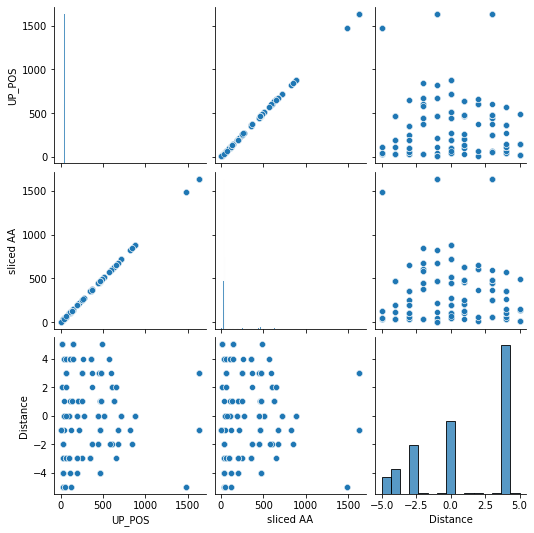

In [83]:
import seaborn
seaborn.pairplot(data.drop('label', axis = 1))

<AxesSubplot:>

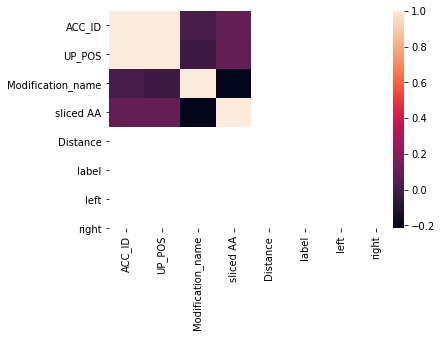

In [84]:
seaborn.heatmap(data.corr(),
                xticklabels=data.columns,
                yticklabels=data.columns)

In [30]:
from sklearn.model_selection import train_test_split

In [101]:
X_train, X_test, y_train, y_test = train_test_split(
   data_oh.drop('label', axis = 1), data_oh['label'], test_size=0.33, random_state=41)

In [102]:
from collections import Counter
Counter(y_test)

Counter({1: 474, 0: 287, -1: 2198})

In [110]:
X_train

,UP_POS,sliced AA,Distance,ACC_ID_A2A368,ACC_ID_O14965,ACC_ID_O43175,ACC_ID_O43597,ACC_ID_O43719,ACC_ID_O60669,ACC_ID_O75153,...,left_T,left_V,right_A,right_I,right_L,right_M,right_P,right_S,right_T,right_V
4542,45,41,4,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
3610,45,45,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6234,45,41,4,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
12204,110,106,4,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6008,45,41,4,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11792,30,33,-3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7201,30,34,-4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6067,45,41,4,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1862,45,45,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [111]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
clf=RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [113]:
preds = clf.predict(X_test)

In [114]:
print (clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.8559533721898418
0.8482595471443055


In [115]:
from sklearn.metrics import confusion_matrix

In [116]:
confusion_matrix(y_test, preds,  labels = [-1, 0, 1])

array([[1966,    0,  232],
       [   2,  285,    0],
       [ 214,    1,  259]], dtype=int64)

In [117]:
pd.DataFrame(clf.feature_importances_, index=X_train.columns).sort_values(by=0, ascending=False)

,0
right_V,1.502113e-01
sliced AA,1.283192e-01
Distance,1.011523e-01
right_I,9.880192e-02
left_G,8.734354e-02
...,...
ACC_ID_Q8N2Y8,1.013747e-05
ACC_ID_Q6ZNW5,4.992701e-07
ACC_ID_P18077,0.000000e+00
ACC_ID_Q8N699,0.000000e+00


In [118]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

In [119]:
# Number of trees in random forest
n_estimators = np.linspace(100, 3000, int((3000-100)/200) + 1, dtype=int)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [1, 5, 10, 20, 50, 75, 100]# Minimum number of samples required to split a node
# min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 9)]
min_samples_split = [1, 2, 5, 10, 15, 20, 30]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Criterion
criterion=['gini', 'entropy']
random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}

In [120]:
random_grid

{'n_estimators': array([ 100,  307,  514,  721,  928, 1135, 1342, 1550, 1757, 1964, 2171,
        2378, 2585, 2792, 3000]),
 'max_depth': [1, 5, 10, 20, 50, 75, 100],
 'min_samples_split': [1, 2, 5, 10, 15, 20, 30],
 'min_samples_leaf': [1, 2, 3, 4],
 'bootstrap': [True, False],
 'criterion': ['gini', 'entropy']}

In [121]:
rf_base = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf_base,
                               param_distributions = random_grid,
                               n_iter = 30, cv = 5,
                               verbose=2,
                               random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 5, 10, 20, 50, 75,
                                                      100],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 5, 10, 15,
                                                              20, 30],
                                        'n_estimators': array([ 100,  307,  514,  721,  928, 1135, 1342, 1550, 1757, 1964, 2171,
       2378, 2585, 2792, 3000])},
                   random_state=42, verbose=2)

In [122]:
rf_random.best_params_

{'n_estimators': 2171,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 5,
 'criterion': 'entropy',
 'bootstrap': True}

In [123]:
print (rf_random.score(X_train, y_train))
print(rf_random.score(X_test, y_test))

0.852789342214821
0.8509631632308212


In [124]:
preds = rf_random.predict(X_test)

In [125]:
confusion_matrix(y_test, preds,  labels = [-1, 0, 1])

array([[2197,    1,    0],
       [   1,  286,    0],
       [ 437,    2,   35]], dtype=int64)

In [126]:
pd.DataFrame(rf_random.best_estimator_.feature_importances_, index=X_train.columns).sort_values(by=0, ascending=False)

,0
sliced AA,0.132874
left_G,0.119663
right_V,0.115889
Distance,0.097768
right_I,0.074938
...,...
ACC_ID_Q9H501,0.000004
ACC_ID_Q8N2Y8,0.000003
ACC_ID_P18077,0.000000
ACC_ID_Q8N699,0.000000


In [284]:
param_grid = {
    'n_estimators': np.linspace(1000, 1700, 5, dtype = int),
    'max_depth': [3, 4, 5,6,7,8,9,10,11,12,13],
    'min_samples_split': [25,27,30,32,35],
    'min_samples_leaf': [1,2, 3, 4]
}

In [285]:
from sklearn.model_selection import GridSearchCV

In [286]:
# Base model
rf_grid = RandomForestClassifier(criterion = 'gini', bootstrap = False)
# Instantiate the grid search model
grid_rf_search = GridSearchCV(estimator = rf_grid, param_grid = param_grid, 
                          cv = 5, n_jobs = 6, verbose = 2)
grid_rf_search.fit(X_train, y_train)

Fitting 5 folds for each of 1100 candidates, totalling 5500 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:   24.4s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:  4.6min
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:  8.7min
[Parallel(n_jobs=6)]: Done 1001 tasks      | elapsed: 14.0min
[Parallel(n_jobs=6)]: Done 1446 tasks      | elapsed: 20.5min
[Parallel(n_jobs=6)]: Done 1973 tasks      | elapsed: 28.9min
[Parallel(n_jobs=6)]: Done 2580 tasks      | elapsed: 39.2min
[Parallel(n_jobs=6)]: Done 3269 tasks      | elapsed: 51.6min
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed: 65.5min
[Parallel(n_jobs=6)]: Done 4889 tasks      | elapsed: 81.0min
[Parallel(n_jobs=6)]: Done 5500 out of 5500 | elapsed: 92.1min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(bootstrap=False), n_jobs=6,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [25, 27, 30, 32, 35],
                         'n_estimators': array([1000, 1175, 1350, 1525, 1700])},
             verbose=2)

In [287]:
grid_rf_search.best_params_

{'max_depth': 6,
 'min_samples_leaf': 4,
 'min_samples_split': 27,
 'n_estimators': 1175}

In [288]:
print (grid_rf_search.score(X_train, y_train))
print(grid_rf_search.score(X_test, y_test))

0.7096615988229524
0.7028872137676007


In [289]:
preds = grid_rf_search.predict(X_test)

In [290]:
cm = confusion_matrix(y_test, preds,  labels = [-1, 0, 1])

In [291]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

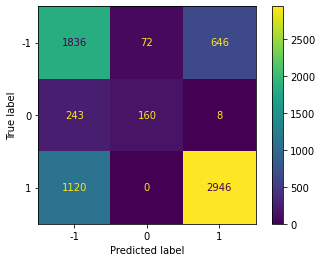

In [292]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=grid_rf_search.classes_)
disp.plot()

plt.show()

In [293]:
from sklearn.metrics import precision_recall_fscore_support

In [294]:
precision_recall_fscore_support(y_test, preds, average='macro')

(0.6939726195566384, 0.6109039227860418, 0.6348438134140354, None)

In [295]:
from sklearn.metrics import classification_report

In [296]:
print(classification_report(y_test, preds, labels=[-1, 0, 1]))

              precision    recall  f1-score   support

          -1       0.57      0.72      0.64      2554
           0       0.69      0.39      0.50       411
           1       0.82      0.72      0.77      4066

    accuracy                           0.70      7031
   macro avg       0.69      0.61      0.63      7031
weighted avg       0.72      0.70      0.71      7031

